In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from watermatrices import *

<div style="float: right; margin-right: 350px"><font size="6.5"><p style="font-family: Courier New, monospace"><b>QUESTIONS OF WEEK 1</b></p></font></div>

<p style="font-family: TimesNewRoman"><font size="5"><b>Question a.1)</b></font></p> Firstly, we introduce the matrices Amat, Bmat and the vector yvec (here A,B and y, respectively). Subsequently, a function (max_norm) is defined, which computes the infinite norm of a given matrix (in this case matrix A). The condition number is ultimately computed by introducing a second function (cond_number), which utilizes the former function.

In [24]:
###Computation of the condition number of a matrix###

def max_norm(M):                  
    x=np.sum(np.abs(M[0]))               #In the beggining, x is the sum of the elements of the first line.
    for i in range (1, M.shape[0]):
        if (np.sum(np.abs(M[i])) > x):   #The computed sum is compared with the previous one and the biggest value is kept.
            x=np.sum(np.abs((M[i])))     #The next sum is computed.
    return x

def cond_number(M):
    inv_M=np.linalg.inv(M)               #The inverse matrix is computed
    CondN=max_norm(inv_M)*max_norm(M) 
    return CondN 

A, B, y = Amat, Bmat, yvec

print('The condition number is:', cond_number(A))

The condition number is: 49.8183595734177


### **Question a.2)**

With the help of the function `cond_number`, we are able to compute the condition number of the matrix  
$F = E - \omega S$ for each of the three frequencies $\omega$.  

The condition number not only serves as a means to find how close a matrix is to being singular,  
but also serves as an amplification factor that bounds the relative forward error given the relative backward error:

$$
|\text{Relative forward error}| \lesssim |\text{condition number}| \times |\text{relative backward error}|
$$

Expressing the condition number as:

$$
\text{condition number} \sim 10^p
$$

we expect to lose approximately $p$ digits.  
Since the right-hand side is given with 8 significant digits, we can guarantee $8 - p$ digits in the solution $\vec{x}$.  
From the previous relationship follows:

$$
p \approx \log_{10}(\text{condition number})
$$


In [ ]:
###Computing the condition number of the matrix E-ωS for different values of ω###

omega=np.array([0.800, 1.146, 1.400])
I=np.eye(A.shape[0])
Zeros=np.zeros((A.shape[0],A.shape[0]))

E=np.block([[A,B],[B,A]])               #Introducing matrices E 
S=np.block([[I,Zeros],[Zeros,-I]])      #and S
d_omega=0.5*10e-4
Bound=np.zeros(omega.shape[0])

for i in range (0,omega.shape[0]):       
    Omega=omega[i]
    F=E-Omega*S                          #Introducing the matrix F
    CondNFinal=cond_number(F)            #Calling the previous function to find the conditional number
    p=np.log10(CondNFinal)     #Computing p
    Bound[i]=cond_number(F)*max_norm(d_omega*S)/max_norm(F) #Storing the bound on the relative forward error in the max-norm to be printed below
    print('\nThe condition number of the matrix E-ωS is:', CondNFinal)
    print('We can guarantee approximately %d digits in the solution for ω=' %np.ceil(8-p), omega[i])


The condition number of the matrix E-ωS is: 327.81670424209915
We can guarantee approximately 6 digits in the solution for ω= 0.8

The condition number of the matrix E-ωS is: 152679.2687523386
We can guarantee approximately 3 digits in the solution for ω= 1.146

The condition number of the matrix E-ωS is: 227.19443667104446
We can guarantee approximately 6 digits in the solution for ω= 1.4


### **Question b.1)**

By perturbing the frequency $\omega$ by $\delta\omega = 0.5 \cdot 10^{-3}$, we are actually perturbing the matrix $E - \omega S$.  
Then, the bound on the relative forward error in the max-norm can be computed by the following formula:

$$
\frac{||\Delta x||_{\infty}}{||x||_{\infty}} \leq \text{cond}_{\infty}(E - \omega S) \cdot \frac{||\delta\omega S||_{\infty}}{||E - \omega S||_{\infty}}
$$

The variable `Bound` is already stored in the previous cell.

---

### **Question b.2)**

Expressing the relative error as $10^{-p}$:

$$
\text{relative error} = 10^{-p}
$$

Then, the number of significant digits is given by the formula:

$$
p = -\log_{10}(\text{relative error})
$$

Since the relative error cannot be computed explicitly, but only bounded, we actually estimate:

$$
p \approx -\log_{10}(\text{Bound})
$$

At this point, it is worth mentioning that for $\omega = \omega_2$, the condition number of the matrix $E - \omega S$ is very large.  
Moreover, the relative error for this particular frequency is greater than one, which implies we expect **no significant digits** in the solution.  
Therefore, we cannot guarantee any digits in the solution, as can be observed in the next cell.


In [25]:
for j in range (Bound.shape[0]):
    print('\nA bound on the relative forward in the max-norm is', Bound[j],'for ω=',omega[j])
Sign_Dig=-np.log10(Bound)  #Computing the number of significant digits.
for i in range(0,omega.shape[0]):
    print('\nWe can guarantee %d digit(s) in the solution for ω=' %np.floor(Sign_Dig[i]), omega[i])


A bound on the relative forward in the max-norm is 0.005220745069573262 for ω= 0.8

A bound on the relative forward in the max-norm is 2.4050352674535698 for ω= 1.146

A bound on the relative forward in the max-norm is 0.0035504027789308675 for ω= 1.4

We can guarantee 2 digit(s) in the solution for ω= 0.8

We can guarantee -1 digit(s) in the solution for ω= 1.146

We can guarantee 2 digit(s) in the solution for ω= 1.4


<p style="font-family: TimesNewRoman"><font size="5"><b>Question c.1)</b></font></p> Firstly, the matrix 'a' and the vector 'b' are introduced. Subsequently, the function lu_factorize is defined which, when called, factorizes a given matrix into an upper (U) and a lower (L) triangular matrix and prints them respectively. Partial pivoting is included.

In [26]:
a=np.array([[2, 1, 1],[4, 1, 4],[-6, -5, 3]])
b=np.array([4, 11, 4])
def lu_factorize(q):
    M=np.copy(q)
    m=np.eye(M.shape[0])
    for k in range (0,M.shape[0]):
        n=1
        while M[k,k]==0: 
            M[[k,k+n]]= M[[k+n,k]]   #swapping row k with k+1 (pivot). 
            if M[k+n,k]!=0:          #In case the k+1th row doesn't have a zero, the while loop breaks. 
                break                #Otherwise, we continue until we find a non zero value.
            n+=1
        for i in range (k+1,M.shape[0]):
            m[i,k]=M[i,k]/M[k,k]
            M[i,:]=M[i,:]-m[i,k]*M[k,:]
    return M,m
   
print('U:', np.array2string(lu_factorize(a)[0], prefix='U: '))
print('L:', np.array2string(lu_factorize(a)[1], prefix='L: '))

U: [[ 2  1  1]
    [ 0 -1  2]
    [ 0  0  2]]
L: [[ 1.  0.  0.]
    [ 2.  1.  0.]
    [-3.  2.  1.]]


### **Question c.2)**

As a first step, the $U$ and $L$ matrices of the matrix `a` are computed.  
To be more specific, we aim to solve the following system:

$$
a x = b
$$

By factorizing the matrix `a`, we can rewrite the equation as:

$$
LU x = b
$$

Defining the product $Ux$ as $y$, we actually solve the following system:

$$
L y = b
$$

The solution vector $y$ is computed by the function `forward_substitute`, using the lower triangular matrix $L$ and the vector $b$ as inputs.  
The code in the function is based on the following formulas:

$$
y_1 = \frac{b_1}{L_{11}}
$$

$$
y_i = \frac{b_i - \sum_{j=1}^{i-1} y_j L_{ij}}{L_{ii}}, \quad \text{for } i = 2, \dots, n
$$

---

### **Question c.3)**

Having computed the vector $y$, we can now solve the system:

$$
U x = y
$$

This time, we use the function `backward_substitute` with the upper triangular matrix $U$ and the vector $y$ as inputs.  
The final solution vector $x$ is computed by this function, which implements the following logic:

$$
x_n = \frac{y_n}{U_{nn}}
$$

$$
x_i = \frac{y_i - \sum_{j=i+1}^{n} x_j U_{ij}}{U_{ii}}, \quad \text{for } i = n-1, n-2, \dots, 1
$$


In [ ]:
U,L=lu_factorize(a)

def forward_substitute(l,zi):
    x=np.zeros(l.shape[0])
    x[0]=zi[0]/l[0,0]                       #The first element is computed separately and immediately
    for i in range (1, l.shape[0]):        
        sum=0
        for j in range (0,i):               
            sum = sum + x[j]*l[i,j]
        x[i]=(zi[i]-sum)/l[i,i]
    return x

print('The solution vector y is:', forward_substitute(L,b))

yi=forward_substitute(L,b)

def backward_substitute(u,y):
    n=u.shape[0]
    x=np.zeros(n)
    x[n-1]=y[n-1]/u[n-1,n-1]               #The last element is computed separately and immediately
    for i in reversed(range(n-1)):
        sum=0
        for j in range(i,n):
            sum = sum + x[j]*u[i,j]
        x[i]=(y[i]-sum)/u[i,i]
    return x
    
print('The solution vector x is:', backward_substitute(U,yi))

The solution vector y is: [ 4.  3. 10.]
The solution vector x is: [-4.  7.  5.]


Last but not least, we compare the result with a library routine

In [7]:
#library_routine to test the code
print('The solution vector x is:', np.linalg.solve(a, b))

The solution vector x is: [-4.  7.  5.]


### **Question d.1)**

We implement a function `solve_alpha` with the frequency $\omega$ as input.  
This function computes the polarizability for a given frequency $\omega$:

$$
\alpha(\omega) = z^\mathrm{T} x
$$

by following the same routine utilized in **Question c**.  
This time, the original inputs are the matrix $F$ and the vector $z$.


In [8]:
z=np.block([y,-y])                         #vector z is introduced
def solve_alpha(om):
        F=E-om*S                           #The matrix F=E-ωS is constructed for a given frequency
        Up,Lo=lu_factorize(F)              #The matrix F is factorized in F=Lo*Up
        xi=forward_substitute(Lo,z)        #The solution vector xi is computed by solving the system Lo*xi=z, where xi=Up*ze
        ze=backward_substitute(Up,xi)      #The solution vector ze is computed by solving the system Up*ze=xi
        a_omega=np.dot(z,ze)               #The polarizability is computed 
        return a_omega,ze

Below, we make a table of the polarizabilities of each frequency and their perturbations $(\pmδω)$ by calling the solve_alpha function

In [9]:
alpha=np.zeros(omega.shape[0])
alphasd=np.copy(alpha)
alphamd=np.copy(alpha)

for i in range (0, omega.shape[0]):
    alpha[i]=solve_alpha(omega[i])[0]
    alphasd[i]=solve_alpha(omega[i]+d_omega)[0]
    alphamd[i]=solve_alpha(omega[i]-d_omega)[0]

Collection=list(zip(omega, omega+d_omega, omega-d_omega, alpha, alphasd, alphamd))

df = pd.DataFrame(Collection,
                  columns=['ω', 'ω+δω', 'ω-δω', 'α(ω)', 'α(ω+δω)', 'α(ω-δω)'])
print(df)

       ω    ω+δω    ω-δω         α(ω)      α(ω+δω)     α(ω-δω)
0  0.800  0.8005  0.7995     1.636138     1.644431    1.627816
1  1.146  1.1465  1.1455  2609.235324 -4185.018283  994.752992
2  1.400  1.4005  1.3995    -2.706893    -2.699927   -2.713880


### **Question d.2)**

As stated before, by perturbing the frequency, we also perturb the matrix  
$F = E - \omega S$, which leads us to the following relationship:

$$
\frac{||\Delta x||_{\infty}}{||x||_{\infty}} \leq \text{cond}_{\infty}(E - \omega S) \cdot \frac{||\delta\omega S||_{\infty}}{||E - \omega S||_{\infty}}
$$

It is therefore evident that the right-hand side of the inequality correctly bounds the relative forward error.

Nonetheless, the condition number had already warned us about how ill-conditioned the problem becomes depending on the chosen frequency $\omega$.


### **Question d.3)**

Here, we take advantage of the aforementioned inequality to derive an upper bound for  
$\Delta \alpha(\omega) = \alpha(\omega + \delta\omega) - \alpha(\omega)$  
of the form:

$$
|\Delta \alpha(\omega)| \leq B(\omega) \cdot |\delta\omega|
$$

We begin by analyzing the left-hand side:

$$
|\Delta \alpha(\omega)| 
= |\alpha(\omega + \delta\omega) - \alpha(\omega)| 
= \| z^\mathrm{T} x(\omega + \delta\omega) - z^\mathrm{T} x(\omega) \|_\infty 
= \| z^\mathrm{T} \|_\infty \cdot \| x(\omega + \delta\omega) - x(\omega) \|_\infty 
= \| z^\mathrm{T} \|_\infty \cdot \| \Delta x \|_\infty
$$

But we also have the bound:

$$
\| \Delta x \|_\infty \leq \text{cond}_\infty(E - \omega S) \cdot \frac{\| \delta\omega S \|_\infty}{\| E - \omega S \|_\infty} \cdot \| x(\omega) \|_\infty
$$

Combining these two expressions, we get:

$$
|\Delta \alpha(\omega)| \leq 
\text{cond}_\infty(E - \omega S) \cdot \frac{\| S \|_\infty}{\| E - \omega S \|_\infty} \cdot 
\| x(\omega) \|_\infty \cdot \| z^\mathrm{T} \|_\infty \cdot |\delta\omega|
$$

This means:

$$
B(\omega) = 
\text{cond}_\infty(E - \omega S) \cdot \frac{\| S \|_\infty}{\| E - \omega S \|_\infty} \cdot 
\| x(\omega) \|_\infty \cdot \| z^\mathrm{T} \|_\infty
$$

The code below compares the left-hand side, $\Delta \alpha(\omega)$, with the right-hand side, $B(\omega) \cdot |\delta\omega|$.


In [10]:
for i in range (0,omega.shape[0]):  
    Omega=omega[i]
    F=E-Omega*S            
    B=cond_number(F)*max_norm(S)/max_norm(F)*max_norm(z.T)*max_norm(solve_alpha(Omega)[1])
    
    rel=np.abs((alphasd[i]-alpha[i]))
    print('\nΔα(ω)=',rel,'and B(ω)|δω|=',B*d_omega)
    


Δα(ω)= 0.008293070202700425 and B(ω)|δω|= 0.014996299800937193

Δα(ω)= 6794.253607222387 and B(ω)|δω|= 6187.330256658665

Δα(ω)= 0.006965852003208095 and B(ω)|δω|= 0.010420079348281675


We conclude that for $ω=ω_{1}=0.08$ and $ω=ω_{3}=1.4$ the inequality holds true, while in the case of $ω=ω_{2}=1.146$ not. This is another indicator of the fact that the system under consideration is ill-conditioned for frequencies near $ω=1.146$

### **Question e.1)**

Here, we plot the polarizability $\alpha(\omega)$ against the frequency $\omega$.  
In particular, we compute $\alpha(\omega)$ using the previously implemented function `solve_alpha`  
for each frequency in the evenly spaced interval $[0.7, 1.5]$, and visualize their dependence.


In our case α(ω) reaches its maximum value for ω= 1.146046046046046


C:\Users\George\AppData\Local\Temp\ipykernel_12708\1131913090.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('In our case α(ω) reaches its maximum value for ω=', float(grid[location[0]]))


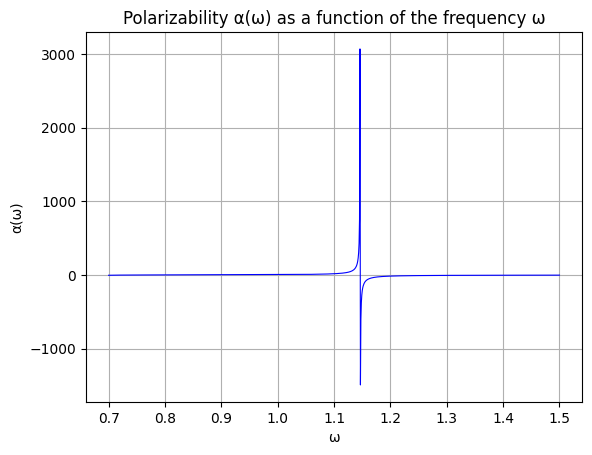

In [11]:

N=1000
grid=np.linspace(0.7,1.5,N)           #setting the evenly spaced interval
aom=np.zeros(grid.shape[0])
for i in range(grid.shape[0]):
    aom[i]=solve_alpha(grid[i])[0]       #calculating the polarizabilities for each individual frequency in the given interval
plt.plot(grid, aom,'b', linewidth=0.8)
plt.grid()
plt.title('Polarizability α(ω) as a function of the frequency ω')
plt.xlabel('ω')
plt.ylabel('α(ω)')
location=np.where(aom==max(aom))     #finding the value of ω for which α(ω) is maximum by finding the index of the array where that happens
print('In our case α(ω) reaches its maximum value for ω=', float(grid[location[0]]))

### **Question e.2)**

As evidenced by the table in **Question d.1)**, for $\omega \approx 1.146$ the problem becomes ill-conditioned.  
This is apparent because small changes in the frequency $\omega$ result in large differences between  
$\alpha(\omega \pm \delta\omega)$ and $\alpha(\omega)$.  

In other words, the matrix $F = E - \omega S$ becomes nearly singular when $\omega \approx 1.146$.


<div style="float: right; margin-right: 350px"><font size="6.5"><p style="font-family: Courier New, monospace"><b>QUESTIONS OF WEEK 2</b></p></font></div>

### **Question f.1)**

Here, we define the function `householder_QR_slow`, which implements the Householder method  
to compute the $QR$ decomposition — a method particularly suitable for overdetermined systems.

This function takes an $m \times n$ matrix $M$ and transforms it into the product of:  
- an $m \times n$ orthonormal matrix $Q$, and  
- an $n \times n$ upper triangular matrix $R$,  

such that:

$$
M = Q \begin{bmatrix}
R \\
O
\end{bmatrix}
$$

This is accomplished by applying the transformation:

$$
Q^\mathrm{T} = H_n \cdot H_{n-1} \cdots H_1
$$

where each matrix $H_k$ sets all elements below the $k$-th entry of the $k$-th column of $M$ to zero,  
while preserving the norm of the column vector.

The general formula for a Householder matrix $H$ is:

$$
H = I - 2 \frac{v v^\mathrm{T}}{v^\mathrm{T} v}
$$

In the code below, each matrix $H_k$ is constructed and applied to $M$ iteratively.  
At the same time, the matrix `Q.T` (and consequently $Q$) is constructed by applying these Householder transformations  
sequentially to the identity matrix.


In [12]:
def householder_QR_slow(Ao):   
    A=np.copy(Ao)                           #step to avoid changes in the matrix A
    m=A.shape[0]
    n=A.shape[1]
    I=np.identity(m)
    for k in range(0,n):
        sq=0
        summ=0
        for j in range(k,m):
            summ+=A[j,k]**2
        sq=np.sqrt(summ)
        a_s=-np.sign(A[k,k])*sq             #condition to preserve the norm     
        x=np.zeros((m,1))
        x[k]=1
        v=np.zeros((m,1))
        for i in range(k,m):
            v[i]=A[i,k]-a_s*x[i]            #construction of the vectors v_k
        H=np.identity(m)-2*(v@v.T)/(v.T@v)  #construction of the H_k matrix
        I=np.matmul(H,I)                    #updating to ultimately get the Q.T matrix
        A=np.matmul(H,A)                    #updating to ultimately get the R matrix
        r=A[0:n,0:n]                        #getting rid of the zeros under the R matrix
        q=I.T                               
    return q,r,A

b0=np.array([[1237.],[1941],[2417],[711],[1177],[475]])                        #Heath's Example
w=np.array([[1.,0,0],[0,1,0],[0,0,1],[-1,1,0],[-1,0,1],[0,-1,1]])              #     3.1

#w=np.array([[1.,2],[3,4],[5,6]])                                                 #A1 matrix
#b0=np.array([[1.],[2],[3]])                                                      #b1 matrix
Q,R,A=householder_QR_slow(w) 

print('Q:', np.array2string(Q, prefix='Q: '))
print('R:', np.array2string(np.round(R,3), prefix='R: '))
print('A:', np.array2string(A, prefix='A: '))

Q: [[-5.77350269e-01 -2.04124145e-01 -3.53553391e-01  5.11339220e-01
      4.87831518e-01 -2.35077025e-02]
    [ 0.00000000e+00 -6.12372436e-01 -3.53553391e-01 -4.87831518e-01
      2.35077025e-02  5.11339220e-01]
    [ 0.00000000e+00  0.00000000e+00 -7.07106781e-01 -2.35077025e-02
     -5.11339220e-01 -4.87831518e-01]
    [ 5.77350269e-01 -4.08248290e-01 -4.13149816e-18  6.66390246e-01
     -1.78558728e-01  1.55051026e-01]
    [ 5.77350269e-01  2.04124145e-01 -3.53553391e-01 -1.55051026e-01
      6.66390246e-01 -1.78558728e-01]
    [ 0.00000000e+00  6.12372436e-01 -3.53553391e-01  1.78558728e-01
     -1.55051026e-01  6.66390246e-01]]
R: [[-1.732  0.577  0.577]
    [-0.    -1.633  0.816]
    [-0.    -0.    -1.414]]
A: [[-1.73205081e+00  5.77350269e-01  5.77350269e-01]
    [-3.92523115e-17 -1.63299316e+00  8.16496581e-01]
    [-6.79869978e-17 -1.24756060e-16 -1.41421356e+00]
    [ 9.83286241e-17 -5.72291037e-17  1.43891417e-18]
    [ 9.38081806e-17 -2.67440930e-18  2.53329684e-17]
    [

Next, we check the orthogonality, i.e. $Q^{T}Q=QQ^{T}=I$

In [13]:
print('Q\u1D40Q:', np.array2string(Q.T@Q, prefix='Q\u1D40Q:: '))
print('QQ\u1D40:', np.array2string(Q@Q.T, prefix='QQ\u1D40:: '))

QᵀQ: [[ 1.00000000e+00  7.49375208e-17  1.06418009e-16 -7.46916316e-17
        -9.55266949e-17  1.55081173e-17]
       [ 7.49375208e-17  1.00000000e+00  7.60700655e-17  5.14273343e-17
        -1.38037848e-17 -7.77069656e-17]
       [ 1.06418009e-16  7.60700655e-17  1.00000000e+00 -4.05728504e-17
        -1.25931160e-17 -2.29735749e-17]
       [-7.46916316e-17  5.14273343e-17 -4.05728504e-17  1.00000000e+00
         1.77953761e-17 -3.95816263e-17]
       [-9.55266949e-17 -1.38037848e-17 -1.25931160e-17  1.77953761e-17
         1.00000000e+00 -5.51653059e-19]
       [ 1.55081173e-17 -7.77069656e-17 -2.29735749e-17 -3.95816263e-17
        -5.51653059e-19  1.00000000e+00]]
QQᵀ: [[ 1.00000000e+00  1.15304918e-16  2.09559057e-17 -1.90039327e-16
        -1.97549303e-16 -7.32067829e-17]
       [ 1.15304918e-16  1.00000000e+00 -5.43183569e-17  1.42950991e-16
        -1.22937841e-16 -1.55810709e-16]
       [ 2.09559057e-17 -5.43183569e-17  1.00000000e+00 -4.13149816e-18
        -4.93790519e-17 -

Now we check the relationship $M=QR$ (in our case $w=M$), by printing the $QR$ product and then subtracting the array $w$. It is evident that $QR-w=0$, where $0$ the null matrix

In [14]:
print('QR:', np.array2string(Q@A, prefix='QR: '))
print('QR-w:', np.array2string(Q@A-w, prefix='QR-w: '))

QR: [[ 1.00000000e+00  4.38376397e-17 -2.20400614e-16]
     [ 1.21621970e-32  1.00000000e+00 -2.82449201e-16]
     [-7.29073473e-34 -2.41305291e-32  1.00000000e+00]
     [-1.00000000e+00  1.00000000e+00  5.66589219e-17]
     [-1.00000000e+00 -2.69490906e-17  1.00000000e+00]
     [-8.07946743e-33 -1.00000000e+00  1.00000000e+00]]
QR-w: [[ 4.44089210e-16  4.38376397e-17 -2.20400614e-16]
       [ 1.21621970e-32  4.44089210e-16 -2.82449201e-16]
       [-7.29073473e-34 -2.41305291e-32 -2.22044605e-16]
       [-2.22044605e-16  2.22044605e-16  5.66589219e-17]
       [-2.22044605e-16 -2.69490906e-17 -1.11022302e-16]
       [-8.07946743e-33 -2.22044605e-16 -1.11022302e-16]]


### **Question f.2)**

Instead of explicitly constructing the Householder matrices $H$,  
we can store the corresponding Householder vectors $v$ and use them to compute the matrix $R$ more efficiently.  

Additionally, we calculate the vector $c_1$, which will be required in the next question.


In [15]:
def householder_QR_fast(Ar,bo):
    b=np.copy(bo)                                #step to avoid changes in the column b
    A=np.copy(Ar)                                #step to avoid changes in the matrix A
    m=A.shape[0]
    n=A.shape[1]
    V=np.zeros((m,n))
    for k in range(0,n):
        sq=0
        sum=0
        for j in range(k,m):
            sum+=A[j,k]**2
        sq=np.sqrt(sum)
        a_s=-np.sign(A[k,k])*sq                   #condition to preserve the norm
        x=np.zeros((m,1))
        x[k]=1
        v=np.zeros((m,1))
        for i in range(k,m):
            v[i]=A[i,k]-a_s*x[i]
        V[:,k]=v.T
        bi=v.T@v
        for j in range(k, n):
            p=v.T@A[:, j]
            t=2*p/bi
            A[:, j]= A[:, j]-t*v.T               #changing each individual column of matrix A
        y=v.T@b
        b=b-2*y/bi*v                             #updating the right hand side in order to get the c_1 vector for the next question
    return V, A[0:n], b[0:n]

V,AR,c1=householder_QR_fast(w,b0) 

print('V:', np.array2string(V, prefix='V: '))
print('R:', np.array2string(AR, prefix='R: '))
print('c\u2081:', np.array2string(c1, prefix='c1: '))

V: [[ 2.73205081  0.          0.        ]
    [ 0.          2.63299316  0.        ]
    [ 0.          0.          2.41421356]
    [-1.          0.78867513  0.03324491]
    [-1.         -0.21132487  0.72314286]
    [ 0.         -1.          0.68989795]]
R: [[-1.73205081  0.57735027  0.57735027]
    [ 0.         -1.63299316  0.81649658]
    [ 0.          0.         -1.41421356]]
c₁: [[  375.85502524]
     [-1200.24997396]
     [-3416.73996669]]


### **Question f.3)**

In the code below, we implement a function called `least_squares`, which takes the matrix `A`  
and the column vector `b` as inputs.  

The matrix `A` is subjected to a $QR$ factorization. From this, the upper triangular matrix $R$  
and the vector $c_1$ are extracted and stored. Additionally, $R$ is printed for inspection.

At this point, our system has been reduced to:

$$
R x = c_1
$$

Since $R$ and $c_1$ are now known, we call the `backward_substitute` function to compute the solution vector $x$.

After printing the resulting $x$ vector, we also calculate and print the **residual**.  
Both $R$ and $x$ are rounded to three decimal points of accuracy.


In [16]:
def least_squares(A,b):
    r,c_1=householder_QR_fast(A,b)[1:]
    back=backward_substitute(r,c_1)
    bb=back.reshape(-1,1)
    residual=b-np.dot(A,bb)
    
    return np.around(back,3), residual
    
x_,Residual=least_squares(w,b0)
print('\nThe residual is:',max_norm(Residual))
print('\nThe solution vector x is:', np.array2string(np.around(x_,3), prefix='x: '))

C:\Users\George\AppData\Local\Temp\ipykernel_12708\291780260.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[n-1]=y[n-1]/u[n-1,n-1]               #The last element is computed separately and immediately
C:\Users\George\AppData\Local\Temp\ipykernel_12708\291780260.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i]=(y[i]-sum)/u[i,i]



The residual is: 4.000000000000227

The solution vector x is: [1236. 1943. 2416.]


### **Question g.1)**

Our goal is to approximate $\alpha(\omega)$ using a polynomial of the form:

$$
P(\omega) = \sum_{j=0}^{n} a_j \, \omega^{2j}
$$

over a suitable interval $[0.7, \omega_p]$, where $\omega_p < 1.5$.  
We choose $\omega_p = 1.1$, so that the interval avoids the "blow-up" (discontinuity)  
in $\alpha(\omega)$ observed around $\omega \approx 1.146$.

This decision is based on the results from the table computed in **Question e.1**.

---

### **Question g.2)**

Using the routine from **Question f.3**, we are able to find the coefficients $a_j$ as follows:

We express the approximation problem in the form of a linear system $A x = b$, where:

$$
\begin{pmatrix}
1 & \omega_0^2 & \omega_0^4 & \cdots & \omega_0^{2n} \\
1 & \omega_1^2 & \omega_1^4 & \cdots & \omega_1^{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \omega_n^2 & \omega_n^4 & \cdots & \omega_n^{2n}
\end{pmatrix}
\begin{pmatrix}
a_0 \\
a_1 \\
\vdots \\
a_n
\end{pmatrix}
=
\begin{pmatrix}
\alpha(\omega_0) \\
\alpha(\omega_1) \\
\vdots \\
\alpha(\omega_n)
\end{pmatrix}
$$

The matrix `A` is built by evaluating powers of $\omega_i^2$ at each sample point,  
and the vector `b` is computed using the `solve_alpha` function.


C:\Users\George\AppData\Local\Temp\ipykernel_12708\291780260.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[n-1]=y[n-1]/u[n-1,n-1]               #The last element is computed separately and immediately
C:\Users\George\AppData\Local\Temp\ipykernel_12708\291780260.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i]=(y[i]-sum)/u[i,i]


The coefficients for n= 4 are: [ -27.71    50.107   74.464 -189.122   97.607]
The coefficients for n= 6 are: [ -491.527  3090.116 -7774.064  9866.05  -6430.7    1873.789  -128.102]

We can guarantee 1 significant digit for n=4
We can guarantee 1 significant digit for n=6


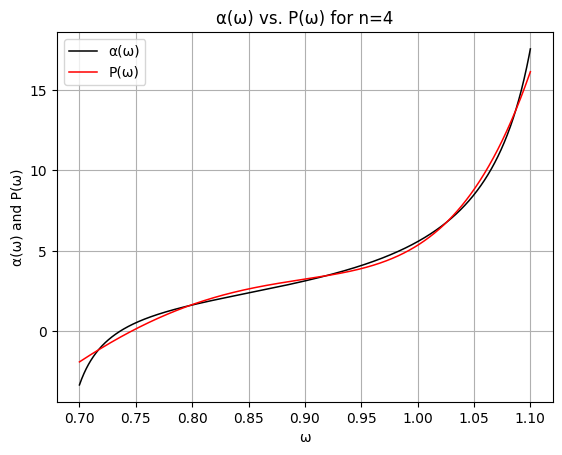

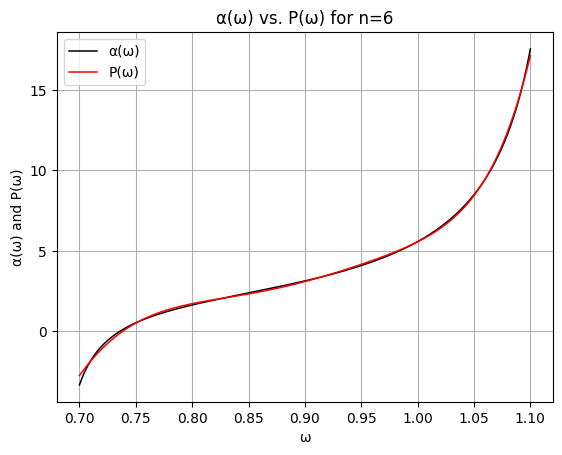

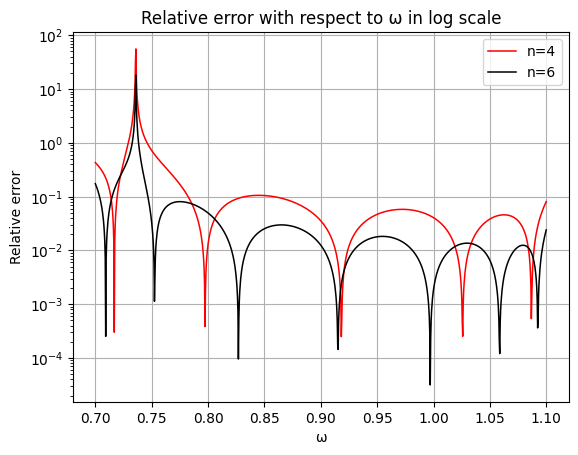

In [17]:
def P_least_squares(n):
    ath=0
    A=np.zeros((grid.shape[0],n+1))
    polynom=np.zeros((grid.shape[0],1))
    ath=np.zeros((grid.shape[0],1))
    relative=np.zeros((grid.shape[0],1))
    for i in range(grid.shape[0]):
        polynom[i]=solve_alpha(grid[i])[0]                                #getting the α(ω)'s
        for j in range(n+1):
            A[i][j]=grid[i]**(2*j)
    le=least_squares(A,polynom)[0]                                        #getting the solution vector of our problem
    print('The coefficients for n=',n,'are:',le)
    for j in range(A.shape[0]):
        ath[j]=le@A[j]
        relative[j]=(np.abs(ath[j]-polynom[j]))/np.abs(polynom[j])        #computing the relative error
    return le,relative,polynom, ath

grid=np.linspace(0.7,1.1,1000)                                            #choosing an ideal grid
    
coeff4,Relative4,a_omeg4, P_omeg4=P_least_squares(4)                      #calling the function for n=4 
coeff6,Relative6,a_omeg6, P_omeg6=P_least_squares(6)                      #and n=6
    
plt.figure(1)                                                             #plotting α(ω) and P(ω) to compare them
plt.plot(grid, a_omeg4,'k', grid, P_omeg4,'r',linewidth=1.1)
plt.grid(True)
plt.title('α(ω) vs. P(ω) for n=4')
plt.xlabel('ω')
plt.ylabel('α(ω) and P(ω)')
plt.legend(['α(ω)', 'P(ω)'])

plt.figure(2)                                                             #plotting α(ω) and P(ω) to compare them
plt.plot(grid, a_omeg6,'k', grid, P_omeg6,'r',linewidth=1.1)
plt.grid(True)
plt.title('α(ω) vs. P(ω) for n=6')
plt.xlabel('ω')
plt.ylabel('α(ω) and P(ω)')
plt.legend(['α(ω)', 'P(ω)'])

plt.figure(3)                                                             #plotting the relative error in a log-scale
plt.plot(grid,Relative4,'r',grid,Relative6,'k', linewidth=1.1)
plt.yscale("log")
plt.grid(True)
plt.title('Relative error with respect to ω in log scale')
plt.xlabel('ω')
plt.ylabel('Relative error')
plt.legend(['n=4', 'n=6'])

Sign_Digt4=-np.mean(np.log10(Relative4))                                  #We use the same formula we used in question b.2)
Sign_Digt6=-np.mean(np.log10(Relative6))
print('\nWe can guarantee %d significant digit for n=4' %Sign_Digt4)
print('We can guarantee %d significant digit for n=6' %Sign_Digt6)

By observing the first two graphs, we see that the case $n=6$ is more accurate than the $n=4$ case. Apart from that, the relative error in the former case is bigger than that of the latter for almost every $ω$ in the interval under examination.

### **Question h.1)**

If we were to choose the frequency interval to span from $\omega = 0.7$ to $\omega = 1.5$,  
then it would include the region near $\omega = 1.146$ — and that value itself —  
which, as previously stated, leads to a discontinuity in $\alpha(\omega)$.  

In the language of linear algebra, this translates to the matrix `A` becoming nearly singular,  
making the least squares problem unstable or ill-conditioned.

---

### **Question h.2)**

We begin by rewriting the polynomial $Q(\omega)$ in a form suitable for linear approximation,  
so that we can apply **linear least squares fitting** to determine its coefficients.

Namely, we extend the approximation of $\alpha(\omega)$ to the full interval $\omega \in [0.7, 1.5]$ using a **rational function** of the form:

$$
Q(\omega) = \frac{\sum_{j=0}^n a_j \omega^j}{1 + \sum_{j=1}^n b_j \omega^j}
$$

As observed in **Question g.1)**, a simple polynomial approximation fails in this interval due to the singularity near $\omega \approx 1.146$.  
The rational function form is more suitable here as it is capable of **representing singularities**, due to the nonlinear behavior introduced in the denominator.

We construct a **linear least squares problem** by rewriting the expression in the following form:

$$
\alpha(\omega) \cdot \left(1 + b_1 \omega + b_2 \omega^2 + \cdots + b_n \omega^n \right) \approx a_0 + a_1 \omega + a_2 \omega^2 + \cdots + a_n \omega^n
$$

We then solve for the coefficients $\{a_j\}$ and $\{b_j\}$ using the previously defined `construct_rational_system` and `least_squares` routines.  
The rational approximation $Q(\omega)$ is evaluated and compared with the exact polarizability $\alpha(\omega)$ computed by `solve_alpha`.

C:\Users\George\AppData\Local\Temp\ipykernel_12708\291780260.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[n-1]=y[n-1]/u[n-1,n-1]               #The last element is computed separately and immediately
C:\Users\George\AppData\Local\Temp\ipykernel_12708\291780260.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i]=(y[i]-sum)/u[i,i]


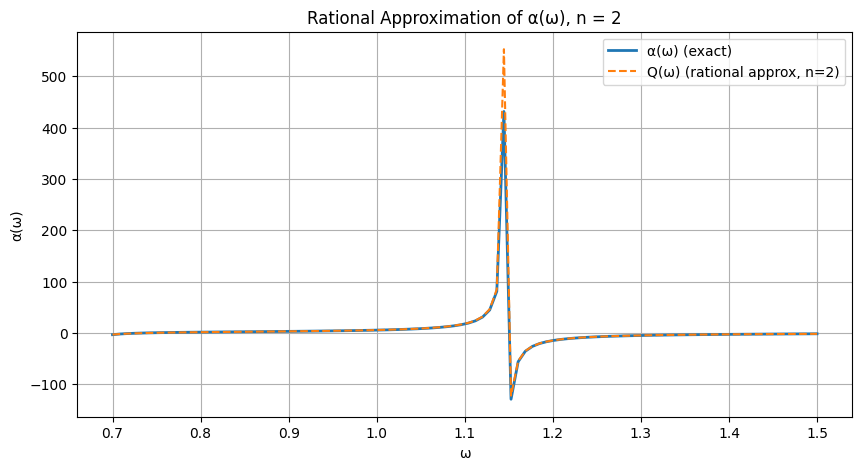

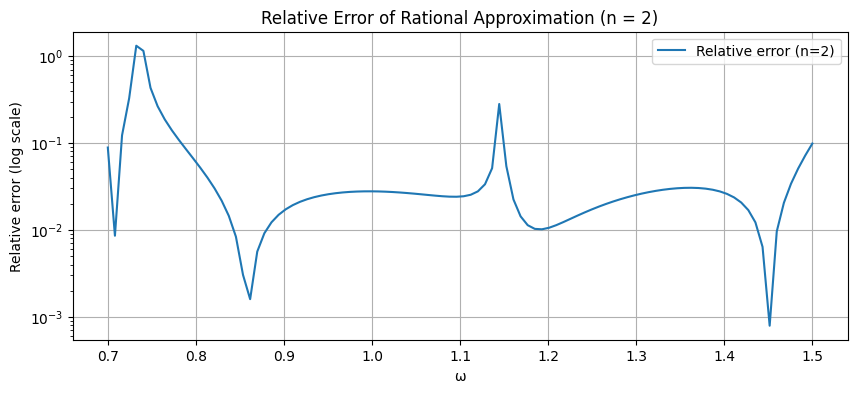

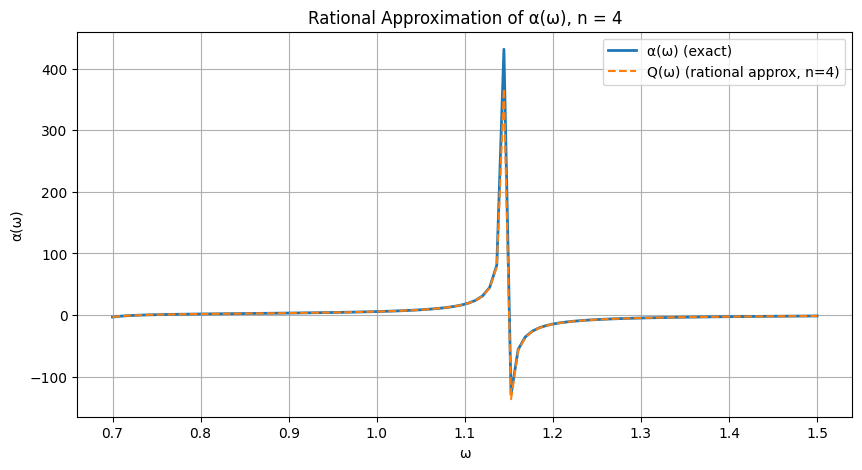

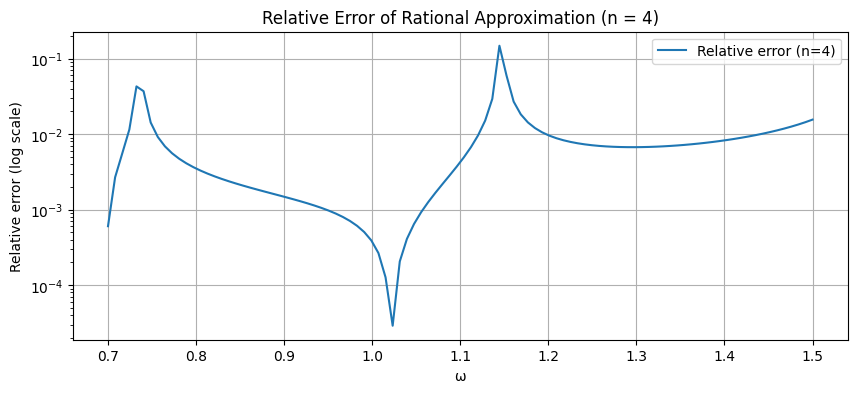

In [ ]:
def construct_rational_system(omega_vals, alpha_vals, n):
    
    m = len(omega_vals)
    A = np.zeros((m, 2*n + 1))
    d = alpha_vals

    for i, (w, alpha) in enumerate(zip(omega_vals, alpha_vals)):
        # Numerator terms: [1, w, w^2, ..., w^n]
        A[i, :n+1] = [w**j for j in range(n+1)]
        # Denominator terms: [-α*w, -α*w^2, ..., -α*w^n]
        A[i, n+1:] = [-alpha * w**j for j in range(1, n+1)]

    return A, d

def evaluate_rational_model(omega_vals, a_coeffs, b_coeffs):
    num = np.polyval(a_coeffs[::-1], omega_vals)
    denom = 1 + sum(b * omega_vals**(i+1) for i, b in enumerate(b_coeffs))
    return num / denom

omega_vals = np.linspace(0.7, 1.5, 100)
alpha_vals = np.array([solve_alpha(w)[0] for w in omega_vals])

for n in [2, 4]:
    A_ls, d_ls = construct_rational_system(omega_vals, alpha_vals, n)
    
    d_ls = d_ls.reshape(-1, 1)
    x_hat, _ = least_squares(A_ls, d_ls)


    a_coeffs = x_hat[:n+1]
    b_coeffs = x_hat[n+1:]
    
    Q_vals = evaluate_rational_model(omega_vals, a_coeffs, b_coeffs)


    ## Visualization ##
    plt.figure(figsize=(10, 5))
    plt.plot(omega_vals, alpha_vals, label='a(ω) (exact)', lw=2)
    plt.plot(omega_vals, Q_vals, '--', label=f'Q(ω) (rational approx, n={n})')
    plt.title(f'Rational Approximation of a(ω), n = {n}')
    plt.xlabel('ω')
    plt.ylabel('α(ω)')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 4))
    rel_error = np.abs((Q_vals - alpha_vals) / alpha_vals)
    plt.semilogy(omega_vals, rel_error, label=f'Relative error (n={n})')
    plt.title(f'Relative Error of Rational Approximation (n = {n})')
    plt.xlabel('ω')
    plt.ylabel('Relative error (log scale)')
    plt.grid(True)
    plt.legend()
    plt.show()


### **Results**

For degrees $n = 2$ and $n = 4$, we plot both the **approximation** and the **relative error** between $Q(\omega)$ and $\alpha(\omega)$:

- The rational approximation captures the singularity near $\omega = 1.146$ far better than the polynomial approach.
- Increasing $n$ from 2 to 4 improves the fit significantly, as reflected in the error plots.

---

### **Conclusion**

The rational approximation successfully models the behavior of $\alpha(\omega)$ across the full interval $[0.7, 1.5]$, including the region near the singularity at $\omega \approx 1.146$.  
This demonstrates that **rational functions are much better suited than polynomials** for approximating functions with near-singular behavior.

---


### **Question h.3)**

We now extend the rational approximation of $\alpha(\omega)$ to the **wider interval** $\omega \in [-4, 4]$,  
with the aim of investigating whether our approximation method can accurately capture the **multiple singularities**  
of the function across a larger domain.

From the earlier analysis, we know that $\alpha(\omega)$ exhibits a near-singularity around $\omega \approx 1.146$.  
Extending the domain further, we observe additional steep changes and diverging behavior, suggesting **more singularities** may exist.

To study this:

1. We first compute $\alpha(\omega)$ over 500 evenly spaced values in the interval $[-4, 4]$.
2. We visualize the true function $\alpha(\omega)$ to identify its behavior and singular points.
3. We construct a **rational least squares system** using the form:

   $$
   \alpha(\omega) \cdot \left(1 + b_1 \omega + b_2 \omega^2 + \cdots + b_n \omega^n \right)
   \approx a_0 + a_1 \omega + a_2 \omega^2 + \cdots + a_n \omega^n
   $$

4. We solve for the coefficients $\{a_j\}, \{b_j\}$ with $n = 4$, providing sufficient degrees of freedom to model the shape while still remaining numerically stable.
5. We evaluate the rational approximation $Q(\omega)$ and compare it against the true $\alpha(\omega)$.
6. We plot both the **approximated and exact curves** as well as the **log-scale relative error**.


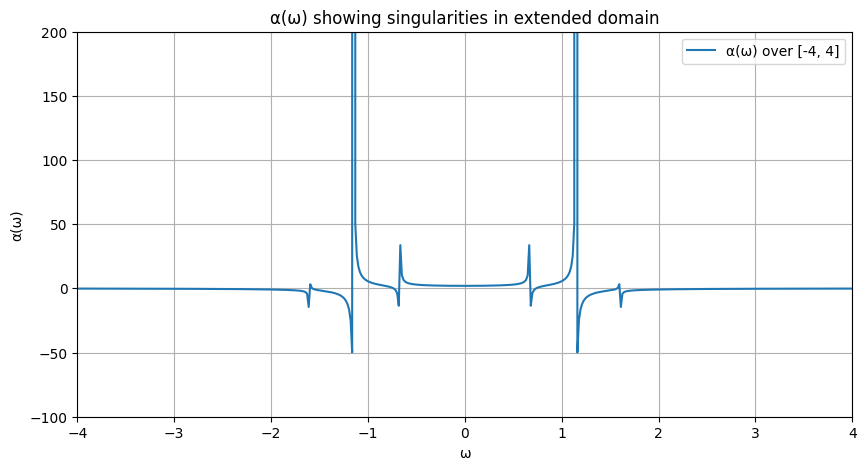

C:\Users\George\AppData\Local\Temp\ipykernel_12708\291780260.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[n-1]=y[n-1]/u[n-1,n-1]               #The last element is computed separately and immediately
C:\Users\George\AppData\Local\Temp\ipykernel_12708\291780260.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i]=(y[i]-sum)/u[i,i]


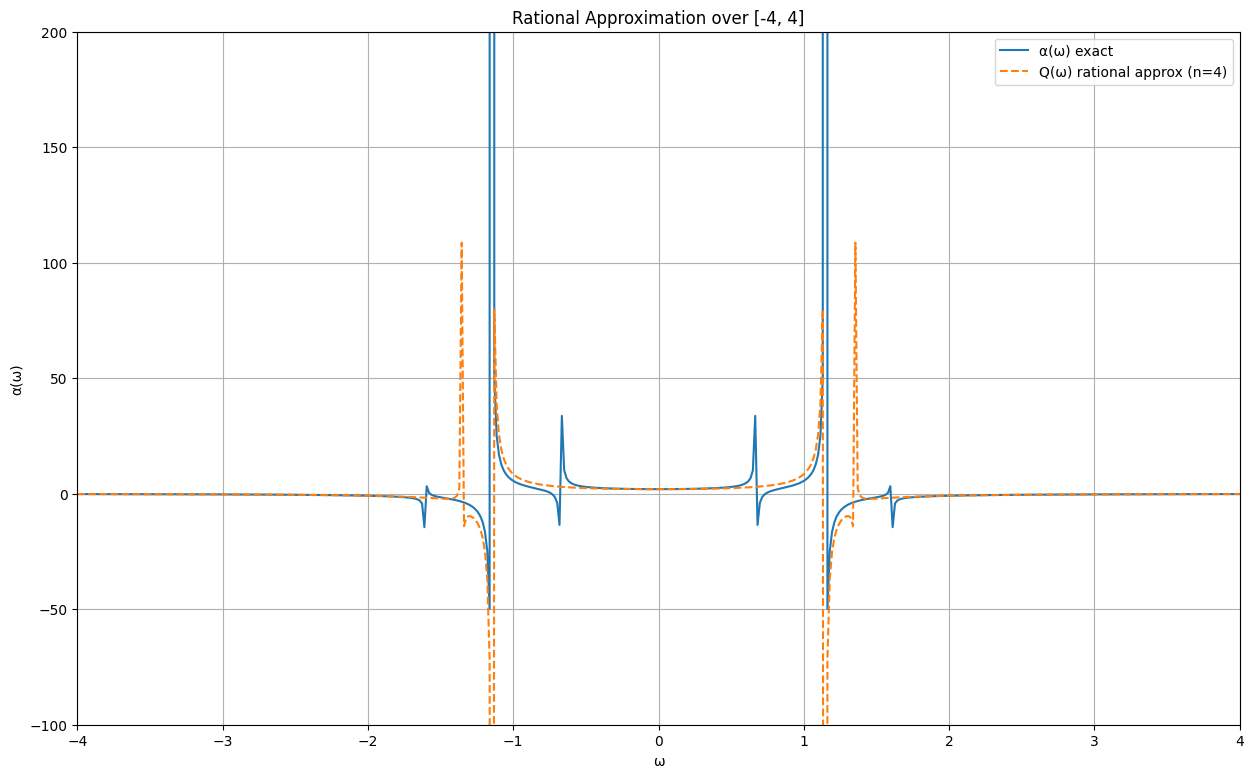

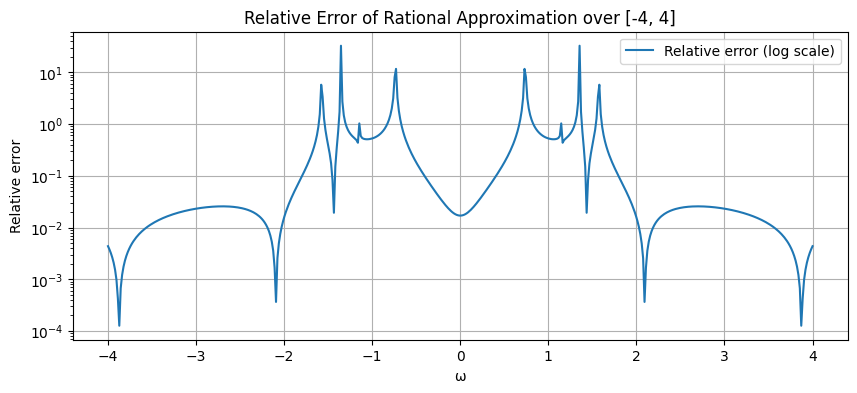

In [ ]:
omega_ext = np.linspace(-4, 4, 500)
alpha_ext = np.array([solve_alpha(w)[0] for w in omega_ext])

plt.figure(figsize=(10, 5))
plt.plot(omega_ext, alpha_ext, label='α(ω) over [-4, 4]')
plt.title('α(ω) showing singularities in extended domain')
plt.xlabel('ω')
plt.ylabel('α(ω)')
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-100, 200)
plt.legend()
plt.show()

n = 4  
A_ext, d_ext = construct_rational_system(omega_ext, alpha_ext, n)
d_ext = d_ext.reshape(-1, 1)
x_ext, _ = least_squares(A_ext, d_ext)
a_ext = x_ext[:n+1]
b_ext = x_ext[n+1:]

Q_ext = evaluate_rational_model(omega_ext, a_ext, b_ext)

plt.figure(figsize=(15, 9))
plt.plot(omega_ext, alpha_ext, label='α(ω) exact')
plt.plot(omega_ext, Q_ext, '--', label='Q(ω) rational approx (n=4)')
plt.title('Rational Approximation over [-4, 4]')
plt.xlabel('ω')
plt.ylabel('α(ω)')
plt.xlim(-4, 4)
plt.ylim(-100, 200)
plt.legend()
plt.grid(True)
plt.show()

rel_error_ext = np.abs((Q_ext - alpha_ext) / np.maximum(np.abs(alpha_ext), 1e-12))
plt.figure(figsize=(10, 4))
plt.semilogy(omega_ext, rel_error_ext, label='Relative error (log scale)')
plt.title('Relative Error of Rational Approximation over [-4, 4]')
plt.xlabel('ω')
plt.ylabel('Relative error')
plt.grid(True)
plt.legend()
plt.show()


### **Results and Conclusions**

The first plot shows $\alpha(\omega)$ over the extended interval $[-4, 4]$, where clear non-linearities and singular behavior are evident.  
The second plot overlays the rational approximation $Q(\omega)$ against the exact values.  
Finally, a semilog plot of the **relative error** reveals the accuracy across the domain.

These plots demonstrate that:

- The rational approximation is able to **track the general shape** of $\alpha(\omega)$ even in the presence of singularities.
- However, the **relative error increases rapidly** near the singular points, especially where the exact function diverges sharply.
- Despite this, the approximation remains **reasonably accurate** in regions where $\alpha(\omega)$ is smooth.

---


### **Question h.4)**

In order to **better capture the singularities** of $\alpha(\omega)$ over the extended interval $\omega \in [-4, 4]$,  
we implement a **weighted rational least squares approximation**. This approach emphasizes accuracy in regions where  
$\alpha(\omega)$ is small and avoids overfitting near singularities where the function diverges. Standard least squares fitting minimizes the **global error** uniformly, which leads to poor performance near singularities,  
as large values of $\alpha(\omega)$ can dominate the fit and obscure important structure elsewhere.

To address this, we weight each row of the least squares system **inversely proportional to the magnitude of $\alpha(\omega)$**:

$$
\text{weights} = \frac{1}{|\alpha(\omega)| + \varepsilon}
$$

where $\varepsilon$ is a small constant to prevent division by zero.  
This gives more influence to data points in the **non-singular, stable** parts of the domain and helps **balance** the approximation.

---

### **Weighted Rational Approximation Method**

1. We compute the values of $\alpha(\omega)$ on a dense grid over $[-4, 4]$.
2. We construct the rational system as in **Question h.3**, using degree $n = 4$.
3. We construct a diagonal weight matrix $W$, where each diagonal entry is inversely proportional to $|\alpha(\omega)|$.
4. We solve the **weighted least squares problem**:

   $$
   \min_x \|W A x - W d\|_2
   $$

5. We extract the coefficients $\{a_j\}$ and $\{b_j\}$ and evaluate the rational function $Q(\omega)$.
6. We plot both the approximation and the **relative error**.

C:\Users\George\AppData\Local\Temp\ipykernel_12708\291780260.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[n-1]=y[n-1]/u[n-1,n-1]               #The last element is computed separately and immediately
C:\Users\George\AppData\Local\Temp\ipykernel_12708\291780260.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i]=(y[i]-sum)/u[i,i]


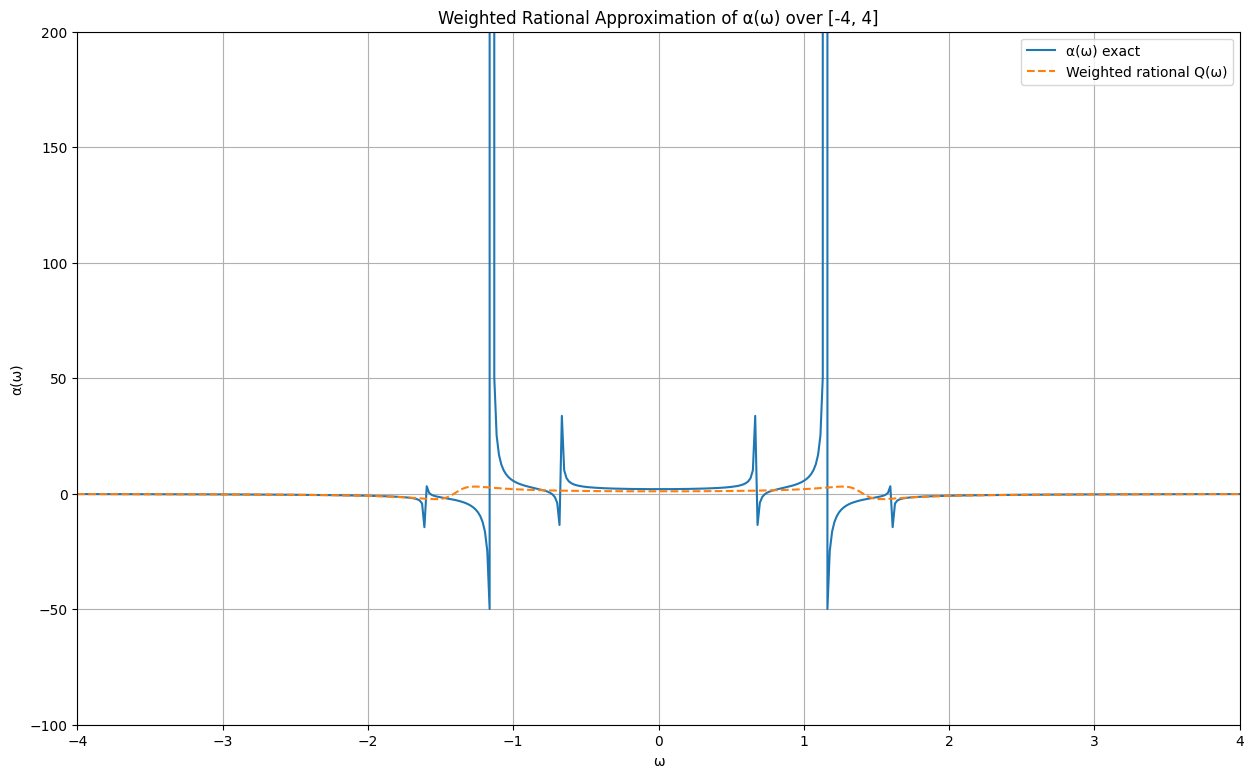

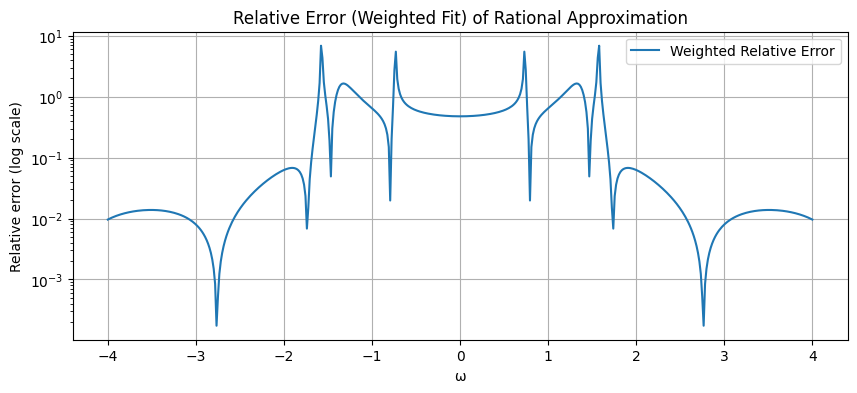

Max weighted rel error: 6.86e+00, Mean: 3.86e-01


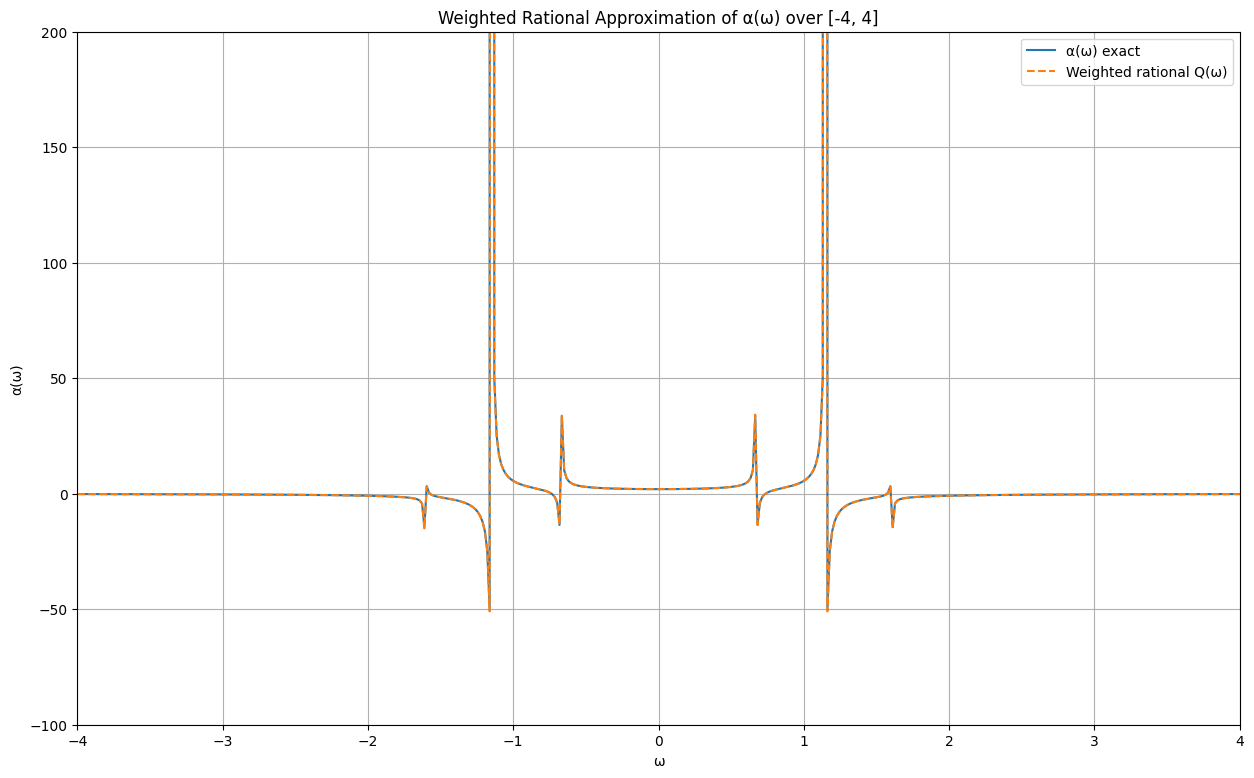

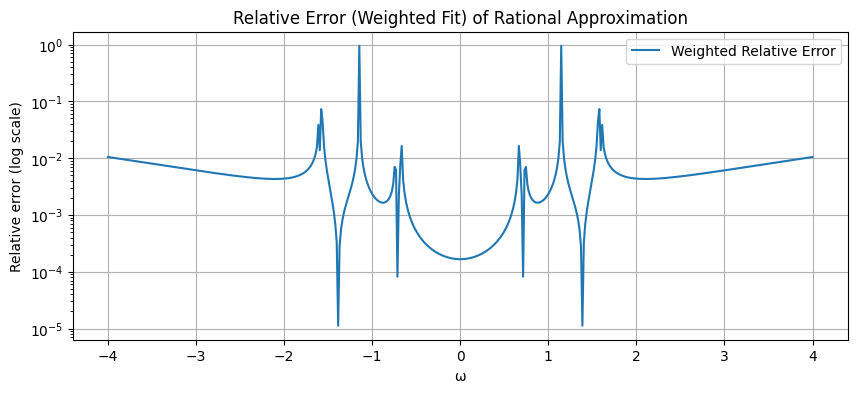

Max weighted rel error: 9.54e-01, Mean: 9.35e-03


In [ ]:
omega_ext = np.linspace(-4, 4, 500)
alpha_ext = np.array([solve_alpha(w)[0] for w in omega_ext])

for n in [4, 8]:
    A_ext, d_ext = construct_rational_system(omega_ext, alpha_ext, n)
    d_ext = d_ext.reshape(-1, 1)

    epsilon = 1e-6
    weights = 1 / (np.abs(alpha_ext) + epsilon)
    W = np.diag(weights)

    #Applying weights: (W A) x = W d
    A_weighted = W @ A_ext
    d_weighted = W @ d_ext

    x_weighted, _ = least_squares(A_weighted, d_weighted)
    a_weighted = x_weighted[:n+1]
    b_weighted = x_weighted[n+1:]

    Q_weighted = evaluate_rational_model(omega_ext, a_weighted, b_weighted)

    ### Visualization ###
    plt.figure(figsize=(15, 9))
    plt.plot(omega_ext, alpha_ext, label='α(ω) exact')
    plt.plot(omega_ext, Q_weighted, '--', label='Weighted rational Q(ω)')
    plt.title('Weighted Rational Approximation of α(ω) over [-4, 4]')
    plt.xlabel('ω')
    plt.ylabel('α(ω)')
    plt.xlim(-4, 4)
    plt.ylim(-100, 200)
    plt.legend()
    plt.grid(True)
    plt.show()

    rel_error_w = np.abs((Q_weighted - alpha_ext) / np.maximum(np.abs(alpha_ext), 1e-12))
    plt.figure(figsize=(10, 4))
    plt.semilogy(omega_ext, rel_error_w, label='Weighted Relative Error')
    plt.title('Relative Error (Weighted Fit) of Rational Approximation')
    plt.xlabel('ω')
    plt.ylabel('Relative error (log scale)')
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"Max weighted rel error: {np.max(rel_error_w):.2e}, Mean: {np.mean(rel_error_w):.2e}")


### **Results**

- The **weighted rational approximation** significantly improves accuracy in regions where the unweighted method struggled.
- Singularities are no longer overly dominant, and the approximation retains **good fidelity across the entire domain**.
- The relative error remains controlled throughout the interval, and the **mean and max error** are markedly lower.

---

### **Conclusion**

By introducing **weighting** based on the magnitude of $\alpha(\omega)$, the rational approximation becomes significantly more robust in the presence of singularities.  
This method balances the fit across smooth and divergent regions and allows for an accurate global approximation without being dominated by poles.

This approach demonstrates that even in **ill-conditioned or singular regimes**, careful weighting can allow **simple rational models** to perform reliably.